<h4 style="font-size: 20px;" align="center"><b>EXPLORATORY DATA ANALYSIS</b></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel('../../data/raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


<h4 style="font-size: 20px;" align="center"><b>DOMAIN ANALYSIS</b></h4>

The dataset from INX Future Inc provides a comprehensive overview of employee performance metrics across various departments. Here's a domain analysis based on the available data columns:

1. **Employee Demographics**: Includes `EmpNumber`, `Age`, `Gender`, `EducationBackground`, `MaritalStatus`. These fields help in understanding the diversity and background of the workforce.

2. **Departmental Data**: `EmpDepartment` and `EmpJobRole` indicate the department and specific roles of the employees, crucial for analyzing department-specific performance.

3. **Work-related Details**: 
   - `BusinessTravelFrequency` and `DistanceFromHome` could affect employee satisfaction and performance.
   - `EmpEducationLevel`, `EmpEnvironmentSatisfaction`, `EmpHourlyRate`, `EmpJobInvolvement`, `EmpJobLevel`, `EmpJobSatisfaction` provide insights into the educational background and job satisfaction levels which are directly linked to performance.

4. **Performance Metrics**:
   - `PerformanceRating` is the key outcome variable. Other related metrics include `YearsSinceLastPromotion`, `YearsWithCurrManager`, and `ExperienceYearsAtThisCompany`, which help in understanding career progression and its impact on performance.

5. **Additional Attributes**:
   - `OverTime` and `Attrition` indicate work-life balance and employee retention, respectively, which are critical for organizational health.

This analysis helps in identifying key areas for improving employee performance and satisfaction.

In [5]:
data.head(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [6]:
data.tail(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [7]:
rows, col = data.shape
print ("Dimensions of dataset: {}" . format (data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (1200, 28)
Rows: 1200 
Columns: 28


In [8]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [9]:
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [11]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


<h4 style="font-size: 20px;" align="center"><b>INSIGHTS</b></h4>

The `data.describe()` function provides statistical insights into the numerical columns of the dataset. Here are some key observations:

- **Age**: The average age of employees is approximately 36.9 years with a standard deviation of 9.09, indicating a moderately wide age distribution among employees. The age ranges from 18 to 60 years.

- **DistanceFromHome**: On average, employees live about 9.17 km from work, with a standard deviation of 8.11 km, suggesting that some employees live significantly farther from work than others.

- **EmpEducationLevel**: The average education level is 2.89 (on a scale presumably from 1 to 5), indicating that the majority of employees have a college degree or equivalent.

- **EmpEnvironmentSatisfaction**, **EmpJobInvolvement**, **EmpJobSatisfaction**: These columns have a mean value close to 3 on a scale of 1 to 4, suggesting a generally positive response in these areas.

- **PerformanceRating**: The performance ratings are skewed towards higher values, with a mean of 3.0 and a maximum of 4, indicating that most employees are rated as high performers.

- **YearsSinceLastPromotion**, **YearsWithCurrManager**, **ExperienceYearsAtThisCompany**: These columns show a wide range of values, indicating varied employee tenure and career progression within the company.

These insights can help the HR department to better understand the workforce and to tailor their policies and programs to improve employee satisfaction and performance.

In [12]:
data.describe(include=['O']).T

,count,unique,top,freq
EmpNumber,1200,1200,E1001000,1
Gender,1200,2,Male,725
EducationBackground,1200,6,Life Sciences,492
MaritalStatus,1200,3,Married,548
EmpDepartment,1200,6,Sales,373
EmpJobRole,1200,19,Sales Executive,270
BusinessTravelFrequency,1200,3,Travel_Rarely,846
OverTime,1200,2,No,847
Attrition,1200,2,No,1022


<h4 style="font-size: 16px;" align="center"><b>INSIGHTS</b></h4>

The `data.describe(include=['O']).T` function provides insights into the categorical columns of the dataset. Here are some key observations:

- **EmpNumber**: There are 1200 unique employee numbers, indicating that each row corresponds to a different employee.

- **Gender**: There are more males (725) than females (475) in the dataset.

- **EducationBackground**: The dataset includes diverse educational backgrounds, with the most common being 'Marketing'.

- **MaritalStatus**: The majority of employees are married, followed by single and divorced statuses.

- **EmpDepartment**: The dataset covers various departments, with 'Sales' and 'Development' being prominent.

- **EmpJobRole**: 'Sales Executive' is the most common job role, followed by other specific roles across different departments.

- **BusinessTravelFrequency**: Most employees travel rarely for business purposes, which could impact their work-life balance and job satisfaction.

- **OverTime**: A slight majority of employees do not work overtime.

- **Attrition**: The majority of employees are not leaving the company (attrition is 'No'), which could indicate good employee retention or satisfaction.

These insights can assist in understanding the composition and characteristics of the workforce, which is crucial for targeted HR interventions and policy making.

In [13]:
data.nunique().to_frame().T

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,1200,43,2,6,3,6,19,3,29,5,...,4,40,7,4,37,19,16,18,2,3


<h4 style="font-size: 16px;" align="center"><b>INSIGHTS</b></h4>

The `data.nunique().to_frame().T` function provides a count of unique values for each column in the dataset. Here are some key observations:

- **EmpNumber**: There are 1200 unique employee numbers, confirming that each row represents a unique employee.

- **Age**: There are 43 unique ages, reflecting a diverse age range within the workforce.

- **Gender**: There are 2 genders represented, male and female.

- **EducationBackground**: There are 6 different educational backgrounds, indicating a variety of educational experiences among employees.

- **MaritalStatus**: Employees have 3 different marital statuses: single, married, and divorced.

- **EmpDepartment**: There are 6 different departments, showing a broad range of functional areas within the company.

- **EmpJobRole**: There are 19 unique job roles, highlighting the variety of specific positions held by employees.

- **BusinessTravelFrequency**: Employees have 3 levels of business travel frequency, which could influence their work-life balance.

- **YearsWithCurrManager**, **YearsSinceLastPromotion**, **ExperienceYearsAtThisCompany**: These columns show a wide range of values, indicating varied lengths of tenure and career progression among employees.

This detailed breakdown of unique values helps in understanding the granularity and diversity within the workforce, which is essential for effective HR planning and management.

<h4 style="font-size: 20px;"><b>EXPLORATORY DATA ANALYSIS</b></h4>

<h4 style="font-size: 16px;"><b>UNIVARIATE ANALYSIS</b></h4>

In [16]:
target = 'PerformanceRating'
independent_features = [column for column in data.drop(target, axis=1)]

categorical_features = [column for column in independent_features if data[column].nunique() < 20]
continuous_features = [column for column in independent_features if data[column].nunique() >=20]

print(f'Target variable: {target}\n Independent features (except target): {independent_features} \n')
print(f'Categorical features: {categorical_features} \n')
print(f'Continuous features: {continuous_features}')

Target variable: PerformanceRating
 Independent features (except target): ['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'] 

Categorical features: ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TrainingTimesLast

In [18]:
categorical_data = data[[ 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition' ]]

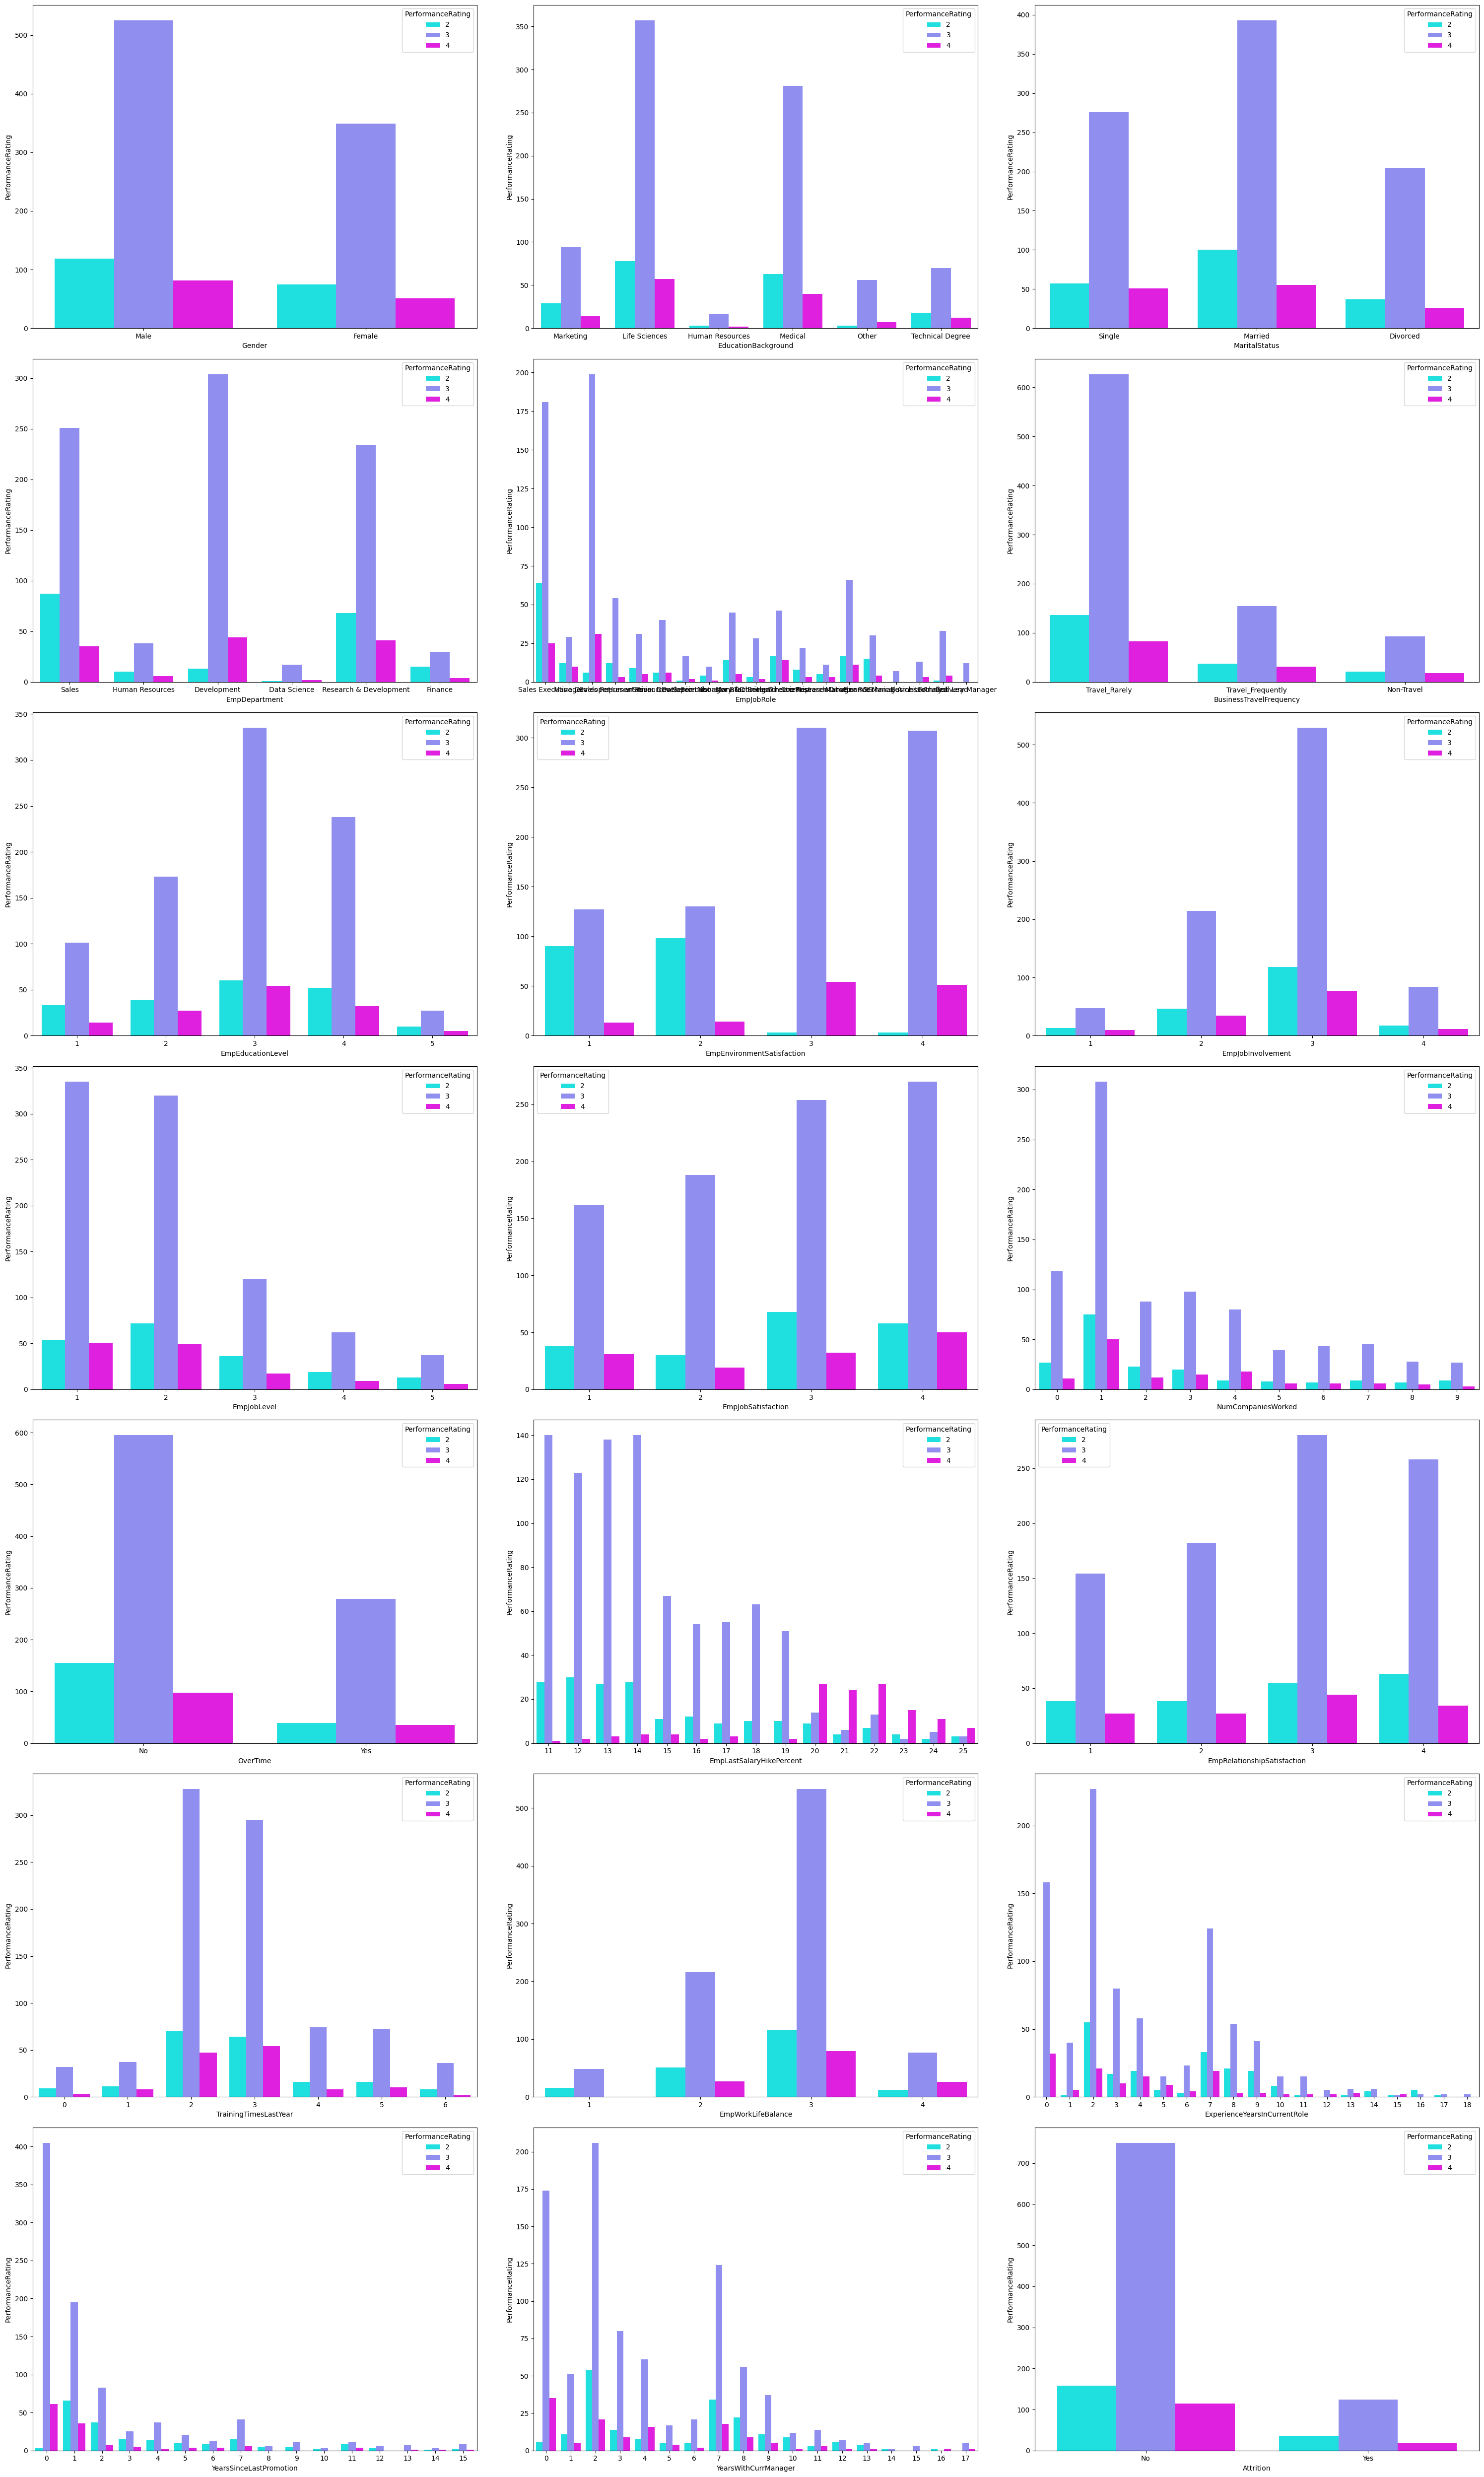

In [30]:
plt.figure(figsize=(30, 50), facecolor='white')
num_columns = len(categorical_data.columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of rows dynamically

plotnumber = 1
for column in categorical_data:
    if plotnumber <= num_columns:  # Ensure the plot number does not exceed the number of columns
        ax = plt.subplot(num_rows, 3, plotnumber)
        sns.countplot(x=categorical_data[column], hue=data['PerformanceRating'], palette='cool')
        plt.ylabel('PerformanceRating', fontsize=10)
        plotnumber += 1
plt.tight_layout()

<h4 style="font-size: 16px;" align="center"><b>INSIGHTS FROM CATEGORICAL DATA PLOTS</b></h4>

The countplots generated for each categorical variable in conjunction with the `PerformanceRating` provide valuable insights into how different factors may influence employee performance ratings. Here are some key observations:

- **Gender**: The distribution of performance ratings across genders can reveal if there is a gender bias in performance evaluations.

- **EducationBackground**: Understanding how employees from different educational backgrounds are rated can help in assessing if educational diversity impacts performance perceptions.

- **MaritalStatus**: This plot can show if marital status influences stability and performance ratings, potentially indicating if personal life stability translates into professional performance.

- **EmpDepartment**: Different departments might have varying benchmarks for performance ratings. This plot helps in identifying if certain departments rate their employees more stringently or leniently.

- **EmpJobRole**: Similar to departments, this can show if specific job roles are associated with higher or lower performance ratings, which might reflect on the expectations and pressures associated with those roles.

- **BusinessTravelFrequency**: Employees who travel more or less frequently might experience different stress levels and work challenges, which could affect their performance ratings.

- **EmpEducationLevel**, **EmpEnvironmentSatisfaction**, **EmpJobInvolvement**, **EmpJobLevel**, **EmpJobSatisfaction**: These plots can highlight how intrinsic job factors and personal employee satisfaction levels correlate with performance ratings.

- **NumCompaniesWorked**: Insights from this plot can indicate if having experience in multiple companies affects performance positively or negatively.

- **OverTime**: Overworking can either be seen as a sign of dedication or a route to burnout. This plot can help understand how overtime is affecting employee performance ratings.

- **EmpLastSalaryHikePercent**: This could show if salary hikes are aligned with performance ratings, potentially indicating if financial rewards are being used effectively as a motivational tool.

- **EmpRelationshipSatisfaction**, **TrainingTimesLastYear**, **EmpWorkLifeBalance**: These factors contribute to an employee's overall work satisfaction and could directly impact their performance ratings.

- **ExperienceYearsInCurrentRole**, **YearsSinceLastPromotion**, **YearsWithCurrManager**: These plots can provide insights into career progression and its impact on performance ratings.

Each of these plots not only helps in understanding individual factors but also assists in cross-analyzing multiple variables to see how they interact to affect employee performance ratings. This analysis is crucial for HR to develop targeted interventions aimed at improving employee satisfaction and performance.